<a href="https://colab.research.google.com/github/kaustubh-karthik/NEA_project/blob/master/NEA_beat_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydub
from pydub import AudioSegment
import wave
import scipy
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
sound = AudioSegment.from_wav("pasoori (3).wav")
sound = sound.set_channels(1)
sound.export("pasoori.wav", format="wav")

<_io.BufferedRandom name='pasoori.wav'>

9885696 44100


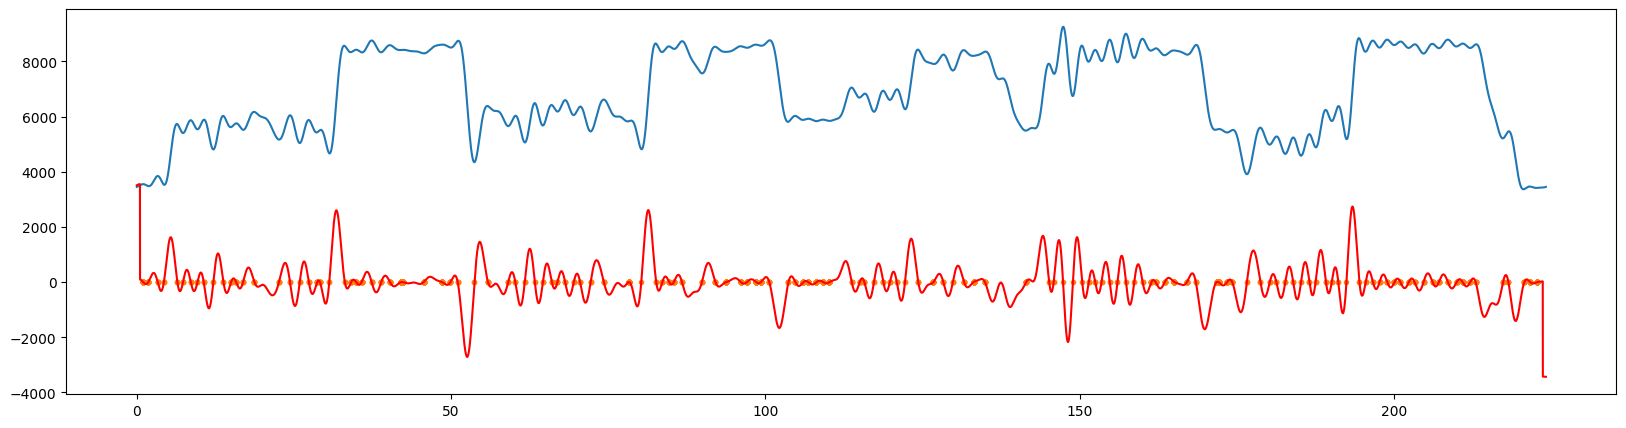

Turning points:  [  1.01360544   1.01362812   1.01365079 ... 222.76843537 222.76845805
 222.76848073]


In [ ]:
import wave
import scipy
import numpy as np
import matplotlib.pyplot as plt

wav_file_name = "pasoori (3)"

# Opening wave file as object
with wave.open(wav_file_name + ".wav", "rb") as wav_obj:
  # Getting metadata of wave audio
  sample_freq = wav_obj.getframerate()
  n_samples = wav_obj.getnframes()
  n_channels = wav_obj.getnchannels()
  signal_wave = wav_obj.readframes(n_samples)
print(n_samples, sample_freq)

# Converts a buffer(byte) object to an Int16 array
signal_array = abs(np.frombuffer(signal_wave, dtype=np.int16))
signal_length = n_samples/sample_freq # In seconds

# Smoothes the wave signal to allow for easier data analysis
filt_num = sample_freq
filt = np.ones(filt_num)/filt_num
signal_smoothed = scipy.signal.fftconvolve(signal_array, filt, mode="same")

# Creates an array corresponding to the time of each audio sample
times = np.linspace(0, signal_length, num=n_samples)

# Creates a Fast Fourier Transform of the smoothed signal array
signal_fft = np.fft.fft(signal_smoothed)

signal_stripped_fft = signal_fft
signal_stripped_fft[100:] = 0

fft_smoothed = np.fft.ifft(signal_stripped_fft)
conv_smoothed = scipy.signal.fftconvolve(fft_smoothed, filt, mode="same") # secondary smoothing

times_len = len(times)
wave_len = len(conv_smoothed)
half_diff = (times_len - wave_len)//2

# Calculating gradients and turning points
smoothed_gradient = np.gradient(conv_smoothed, times).real
turning_points = np.where(np.round(smoothed_gradient, 1) == 0)[0]
with open("turning_points.txt", 'w') as tps:
  turning_points_seconds = turning_points/sample_freq
  turning_points_seconds.tofile(tps, sep=', ')

plt.figure(figsize=(20,5))
plt.plot(times, fft_smoothed)
plt.plot(turning_points/sample_freq, np.zeros(len(turning_points)), '.')
plt.plot(times, smoothed_gradient, color="r")
plt.show()
# Prints the times(in seconds) of turning points
print("Turning points: ", turning_points/sample_freq)


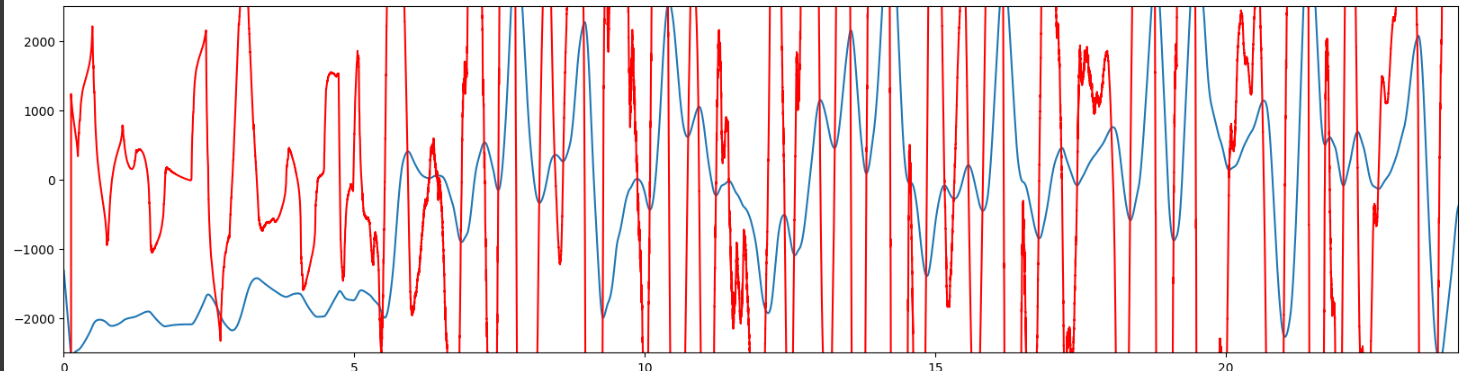

[]


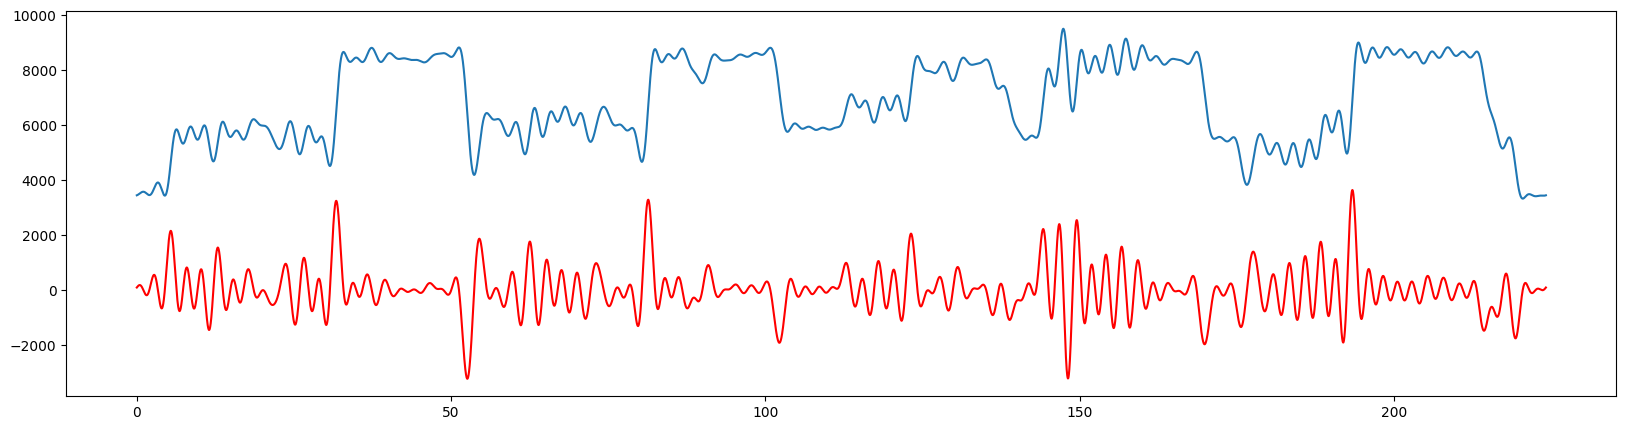

In [ ]:
wav_file_name = "pasoori (3)"

# Opening wave file as object
with wave.open(wav_file_name + ".wav", "rb") as wav_obj:
  # Getting metadata of wave audio
  sample_freq = wav_obj.getframerate()
  n_samples = wav_obj.getnframes()
  n_channels = wav_obj.getnchannels()
  signal_wave = wav_obj.readframes(n_samples)

times = np.linspace(0, signal_length, n_samples)


dct = np.fft.fft(signal_array, norm="ortho")

dct[100:] = 0

fft_smoothed = np.fft.ifft(dct, norm="ortho")
filt = np.ones(15)/15
conv_smoothed = np.convolve(fft_smoothed, filt, mode="valid")
smoothed_gradient = np.gradient(conv_smoothed, times[7:-7])
turning_points = np.where(np.round(smoothed_gradient, 2) == 0)[0]

with open("beats.txt", "w") as beats:
  beat_time = sorted(list(set(np.round(turning_points/sample_freq, 1))))
  beat_wait = [np.round(beat_time[i] - beat_time[i-1], 1) for i in range(1,len(beat_time))]
  beats.write(", ".join(map(lambda x:str(x), beat_wait)))
print(beat_time)

plt.figure(figsize=(20,5))
plt.plot(times, fft_smoothed)
plt.plot(turning_points/sample_freq, np.zeros(len(turning_points)), '.')
plt.plot(times[7:-7], smoothed_gradient, color="r")
#--plt.plot(times[7:-7], conv_smoothed)
#plt.xlim(0, n_samples/sample_freq)
plt.show()

